# 강사님 버전 

### [네이버 리뷰 데이터셋 전처리] <hr>
- train : https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt
- test : https://raw.githubusercontent.com/e9t/nsmc/master/ratings_test.txt

- [1] 데이터 준비 <hr>

In [2]:
# 데이터 다운로드
from urllib.request import urlretrieve

filename = '../data/ratings_te.txt'
train_url = "https://raw.githubusercontent.com/e9t/nsmc/master/ratings_test.txt"


ret = urlretrieve(train_url, filename)

In [3]:
# !pip install html5lib

In [4]:
import pandas as pd

data = pd.read_table(filename, usecols = (1,2))
data

document  label
0                                                    굳 ㅋ      1
1                                   GDNTOPCLASSINTHECLUB      0
2                 뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아      0
3                       지루하지는 않은데 완전 막장임... 돈주고 보기에는....      0
4      3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠??      0
...                                                  ...    ...
49995          오랜만에 평점 로긴했네ㅋㅋ 킹왕짱 쌈뽕한 영화를 만났습니다 강렬하게 육쾌함      1
49996       의지 박약들이나 하는거다 탈영은 일단 주인공 김대희 닮았고 이등병 찐따 OOOO      0
49997                 그림도 좋고 완성도도 높았지만... 보는 내내 불안하게 만든다      0
49998     절대 봐서는 안 될 영화.. 재미도 없고 기분만 잡치고.. 한 세트장에서 다 해먹네      0
49999                                         마무리는 또 왜이래      0

[50000 rows x 2 columns]

- [2] 데이터 전처리 <hr>
    * 결측치, 중복 데이터 
    * 클래스 균형 데이터 여부 
    * 텍스트 데이터 전처리 => 정제 (불용어, 노이즈 데이터 제거), 토큰화, 정제, 단어사전
    * 텍스트 데이터 인코딩 
    * 텍스트 데이터 패딩

한국어 불용어 리스트 : https://gist.githubusercontent.com/chulgil/d10b18575a73778da4bc83853385465c/raw/a1a451421097fa9a93179cb1f1f0dc392f1f9da9/stopwords.txt

- 결측치, 중복데이터, 클래스 균형 데이터 여부

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   document  49997 non-null  object
 1   label     50000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 781.4+ KB


In [6]:
data.isna().sum()

document    3
label       0
dtype: int64

In [7]:
data.duplicated().sum()

794

In [8]:
data.drop_duplicates(keep = 'first', inplace = True)

In [9]:
data[data.duplicated()]

Empty DataFrame
Columns: [document, label]
Index: []

In [10]:
data['label'].unique()

array([1, 0])

In [11]:
data['label'].value_counts()

label
1    24735
0    24471
Name: count, dtype: int64

- 텍스트 데이터 전처리 => 정제 (불용어, 노이즈 데이터 제거), 토큰화, 정제, 단어사전

In [12]:
import string

punctuation = string.punctuation
len(punctuation)

import numpy as np
# regex=True ==> 정규식 적용

data['document'].replace(r'[{}]'.format(string.punctuation), '', regex=True, inplace=True)
hanguel_pattern = "[^ㄱ-ㅎㅏ-ㅣ가-힣]"

In [13]:
# 한글과 공백을 제외하고 모두 제거
data['document'] = data['document'].str.replace(hanguel_pattern, '', regex=True)
data['document'][:5]

0                               굳ㅋ
1                                 
2         뭐야이평점들은나쁘진않지만점짜리는더더욱아니잖아
3             지루하지는않은데완전막장임돈주고보기에는
4    만아니었어도별다섯개줬을텐데왜로나와서제심기를불편하게하죠
Name: document, dtype: object

In [14]:
import numpy as np
data['document'] = data['document'].str.replace('^ +', "")
data.dropna(inplace = True)
data.isna().sum()

document    0
label       0
dtype: int64

In [15]:
filename = '../data/kr_stopword.txt'
url = "https://gist.githubusercontent.com/chulgil/d10b18575a73778da4bc83853385465c/raw/a1a451421097fa9a93179cb1f1f0dc392f1f9da9/stopwords.txt"
ret = urlretrieve(url, filename)

# 

#### 토큰화 <hr>

In [16]:
# 토큰화
from konlpy.tag import Okt

In [17]:
# 형태소 분석기 인스턴스 생성
okt = Okt()

In [18]:
result = data.document.str.cat(data['document'])
result

0                                                     굳ㅋ굳ㅋ
1                                                         
2         뭐야이평점들은나쁘진않지만점짜리는더더욱아니잖아뭐야이평점들은나쁘진않지만점짜리는더더욱아니잖아
3                 지루하지는않은데완전막장임돈주고보기에는지루하지는않은데완전막장임돈주고보기에는
4        만아니었어도별다섯개줬을텐데왜로나와서제심기를불편하게하죠만아니었어도별다섯개줬을텐데왜로나...
                               ...                        
49995    오랜만에평점로긴했네ㅋㅋ킹왕짱쌈뽕한영화를만났습니다강렬하게육쾌함오랜만에평점로긴했네ㅋㅋ킹...
49996    의지박약들이나하는거다탈영은일단주인공김대희닮았고이등병찐따의지박약들이나하는거다탈영은일단...
49997     그림도좋고완성도도높았지만보는내내불안하게만든다그림도좋고완성도도높았지만보는내내불안하게만든다
49998    절대봐서는안될영화재미도없고기분만잡치고한세트장에서다해먹네절대봐서는안될영화재미도없고기분...
49999                                     마무리는또왜이래마무리는또왜이래
Name: document, Length: 49204, dtype: object

In [19]:
data['document'].isnull().sum()

0

In [20]:
# hangul_stopword = "https://gist.githubusercontent.com/chulgil/d10b18575a73778da4bc83853385465c/raw/a1a451421097fa9a93179cb1f1f0dc392f1f9da9/stopwords.txt"

# ret2 = urlretrieve(hangul_stopword, "../data/stop_word.scv")

# stpoword = pd.read_csv( "../data/stop_word.scv")

# stpoword.iloc[:,0]

# data['document'] = data['document'].str.replace(stopword, '', regex=True)



In [21]:
# 불용어 제거
stopwords_path = "../data/stop_word.txt"

# 파일 열기
with open(stopwords_path, encoding="utf-8") as f:
    stopwords = f.readlines()
stopwords = [word.strip() for word in stopwords]
stopwords
# 데이터 제거
for sword in stopwords:
    if sword in vocab.keys():
        vocab.pop(sword)

NameError: name 'vocab' is not defined

In [ ]:
documentDF = data

vocab = {}
for idx in range(documentDF.shape[0]):
    result = okt.morphs(documentDF.iloc[idx][0])
    for word in result:
        if len(word) >=2:
            if vocab.get(word) != None:
               vocab[word] +=1
            else:
                vocab[word] =1

NameError: name 'data' is not defined

In [ ]:
sorted(vocab.items(), key= lambda x:x[1], reverse=True)

[('영화', 15168),
 ('너무', 3465),
 ('정말', 3122),
 ('진짜', 2801),
 ('으로', 2362),
 ('평점', 2180),
 ('에서', 2161),
 ('최고', 1955),
 ('연기', 1857),
 ('생각', 1808),
 ('이런', 1716),
 ('이영화', 1692),
 ('스토리', 1664),
 ('이다', 1658),
 ('감동', 1626),
 ('사람', 1609),
 ('드라마', 1592),
 ('보고', 1399),
 ('ㅋㅋ', 1377),
 ('배우', 1374),
 ('하고', 1368),
 ('감독', 1361),
 ('보다', 1284),
 ('까지', 1279),
 ('그냥', 1264),
 ('시간', 1199),
 ('재미', 1151),
 ('없는', 1088),
 ('쓰레기', 1067),
 ('봤는데', 1044),
 ('작품', 1002),
 ('사랑', 995),
 ('ㅠㅠ', 897),
 ('마지막', 886),
 ('없다', 858),
 ('정도', 852),
 ('같은', 815),
 ('처음', 809),
 ('완전', 799),
 ('좋은', 798),
 ('ㅋㅋㅋ', 792),
 ('이렇게', 781),
 ('이나', 775),
 ('액션', 774),
 ('주인공', 764),
 ('최악', 757),
 ('입니다', 749),
 ('내용', 726),
 ('ㅡㅡ', 725),
 ('이야기', 694),
 ('느낌', 694),
 ('연출', 685),
 ('다시', 659),
 ('인데', 657),
 ('없고', 651),
 ('명작', 642),
 ('봐도', 639),
 ('장면', 628),
 ('많이', 626),
 ('역시', 625),
 ('때문', 622),
 ('그리고', 597),
 ('라고', 593),
 ('지금', 591),
 ('재밌게', 591),
 ('별로', 579),
 ('여자', 579),
 ('이건', 578),
 ('

In [ ]:
sorted(vocab.items(), reverse=False)

[('ㄱㄱ', 5),
 ('ㄱㄱㄱ', 2),
 ('ㄱㄱㄱㄱ', 1),
 ('ㄱㄱㄱㄱㄱㄱㄱㄱ', 1),
 ('ㄱㄱㅣ', 2),
 ('ㄱㅂㅋㄹㄱ', 1),
 ('ㄱㅇㅈㄴㅁㅅㄱㅅ', 1),
 ('ㄱㅈ', 1),
 ('ㄱㅈㅇ', 1),
 ('ㄱㅊ', 4),
 ('ㄱㅋㅋ', 2),
 ('ㄱㅏㅁ', 1),
 ('ㄱㅏㅜㅜ', 1),
 ('ㄱㅐ', 6),
 ('ㄱㅣ', 1),
 ('ㄲㅈ', 1),
 ('ㄲㅋㅋㅋ', 1),
 ('ㄴㄴ', 8),
 ('ㄴㄴㄴ', 1),
 ('ㄴㅅㅈㅅㄷㄹㄱㅂ', 1),
 ('ㄴㅇ', 2),
 ('ㄴㅏ', 2),
 ('ㄴㅐ', 1),
 ('ㄴㅓ', 1),
 ('ㄴㅔㅋ', 1),
 ('ㄷㄱ', 1),
 ('ㄷㄱㄷㄱㄷㄱㄷㄱ', 1),
 ('ㄷㄷ', 102),
 ('ㄷㄷㄷ', 41),
 ('ㄷㄷㄷㄷ', 12),
 ('ㄷㄷㄷㄷㄷ', 1),
 ('ㄷㄷㄷㄷㄷㄷㄷ', 1),
 ('ㄷㄷㄷㄷㄷㄷㄷㄷㄷㄷㄷㄷㄷㄷㄷㄷㄷㄷㄷㄷㄷㄷㄷㄷㄷㄷ', 1),
 ('ㄷㄷㅎ', 1),
 ('ㄷㅃㅅㅊㅎㄱㅅ', 1),
 ('ㄷㅋㄷ', 1),
 ('ㄷㅎㅎ', 1),
 ('ㄷㅏ', 3),
 ('ㄷㅐ', 1),
 ('ㄷㅐㅏㅇ', 1),
 ('ㄹㄹ', 2),
 ('ㄹㄹㄹㅇㄹㄹㄹㄹ', 1),
 ('ㄹㅇ', 14),
 ('ㄹㅇㄴㅁㄹㅇㄴㅁㄹㅇㄴㅁㄹㅇㄴㅁㄹㅇㄴㅁㄹㅇㄴㅁㄹㅇㄴㅁㄹㅇㄴㅁㄹㅇㄴㅁ', 1),
 ('ㄹㅇㅂㅂㅂㄱ', 1),
 ('ㄹㅇㅄ', 1),
 ('ㄹㅇㅇㅈ', 1),
 ('ㄹㅎㅎㅎ', 1),
 ('ㄹㅐ', 1),
 ('ㄹㅔ', 1),
 ('ㄹㅣㅎㅎ', 1),
 ('ㅁㄴㄹ', 2),
 ('ㅁㄷ', 1),
 ('ㅁㅃㅃ', 1),
 ('ㅁㅇ', 1),
 ('ㅁㅈ', 1),
 ('ㅁㅈㅎ', 5),
 ('ㅁㅈㅎㅁㅈㅎㅁㅈㅎ', 1),
 ('ㅁㅊ', 12),
 ('ㅁㅊㅋㅋㅋㅋ', 1),
 ('ㅁㅋㅋㅋㅋ', 1),
 ('ㅁㅏㅊㅣ', 1),
 ('ㅂㄷㅂㄷ', 2),
 ('ㅂㄹ', 1),
 ('ㅂㅁㄴ', 1),
 ('ㅂㅂ', 1),
 ('ㅂㅂㅂㅂㅂㅂㅂㅂㅂㅂㅂㅂㅂㅂㅂㅂㅂㅂㅂㅂㅂㅂ', 1),
 ('ㅂㅅ', 12),

In [ ]:
documentList = pd.Series(documentDF.iloc[:,0]).to_list

In [ ]:
# 불용어 제거
stopwords_path = "../data/stop_word.txt"

# 파일 열기
with open(stopwords_path, encoding="utf-8") as f:
    stopwords = f.readlines()
stopwords = [word.strip() for word in stopwords]

# 데이터 제거
for sword in stopwords:
    if sword in vocab.keys():
        vocab.pop(sword)

In [ ]:
vocab['평점']

2180

In [ ]:
vocab2 ={}
vocab3 = {}
for k, v in vocab.items():
    if v>100:
        vocab2[k] = v
    if v>50:
        vocab3[k] = v

In [ ]:
vocab, len(vocab)

({'평점': 2180,
  '나쁘진': 12,
  '않지': 10,
  '만점': 177,
  '더욱': 90,
  '아니잖아': 16,
  '지루하지는': 4,
  '않은데': 22,
  '완전': 799,
  '막장': 209,
  '임돈': 2,
  '주고': 104,
  '보기': 523,
  '에는': 342,
  '아니었어도': 6,
  '줬을텐데': 1,
  '로나': 20,
  '심기': 1,
  '불편하게하죠': 1,
  '음악': 377,
  '주가': 8,
  '최고': 1955,
  '영화': 15168,
  '진정한': 95,
  '쓰레기': 1067,
  '미국': 209,
  '애니': 283,
  '튀어나온듯': 1,
  '창의력': 2,
  '없는': 1088,
  '로봇': 36,
  '디자인': 19,
  '부터가': 28,
  '고개': 39,
  '젖게한': 1,
  '갈수록': 195,
  '개판': 59,
  '되가는': 1,
  '중국영화': 32,
  '유치하고내용': 1,
  '없음': 287,
  '잡다': 2,
  '끝남말도': 1,
  '안되는': 191,
  '무기': 36,
  '유치한': 51,
  '남무': 1,
  '그립다': 24,
  '동사서독': 2,
  '같은': 815,
  '이건': 578,
  '류작': 25,
  '이다': 1658,
  '이별': 33,
  '아픔': 40,
  '찾아오는': 3,
  '새로운': 67,
  '인연': 20,
  '기쁨': 10,
  '모든': 363,
  '사람': 1609,
  '그렇지는': 3,
  '않네': 13,
  '괜찮네요': 29,
  '오랜': 214,
  '포켓몬스터': 4,
  '잼밌': 2,
  '한국': 403,
  '독립영화': 73,
  '한계': 50,
  '그렇게': 212,
  '아버지': 124,
  '된다와': 1,
  '비교': 152,
  '청춘': 62,
  '아름답': 7,
  '다그': 155,
  '아름다

In [ ]:
vocab2, len(vocab2)

({'평점': 2180,
  '만점': 177,
  '완전': 799,
  '막장': 209,
  '주고': 104,
  '보기': 523,
  '에는': 342,
  '음악': 377,
  '최고': 1955,
  '영화': 15168,
  '쓰레기': 1067,
  '미국': 209,
  '애니': 283,
  '없는': 1088,
  '갈수록': 195,
  '없음': 287,
  '안되는': 191,
  '같은': 815,
  '이건': 578,
  '이다': 1658,
  '모든': 363,
  '사람': 1609,
  '오랜': 214,
  '한국': 403,
  '그렇게': 212,
  '아버지': 124,
  '비교': 152,
  '다그': 155,
  '아름다운': 249,
  '반전': 443,
  '스토리': 1664,
  '출연': 218,
  '감독': 1361,
  '인데': 657,
  '발연기': 130,
  '진짜': 2801,
  '이렇게': 781,
  '연기': 1857,
  '재미': 1151,
  '방송': 148,
  '몇번': 140,
  '시리즈': 354,
  '가장': 251,
  '많은': 259,
  '작가': 270,
  '작품': 1002,
  '지금': 591,
  '라도': 134,
  '상당히': 122,
  '충격': 180,
  '나름': 279,
  '교훈': 120,
  '코미디': 327,
  '재밌게': 591,
  '였다': 333,
  '인상': 165,
  '하고': 1368,
  '대로': 173,
  '새끼': 108,
  '그냥': 1264,
  '한테': 260,
  '없었다': 142,
  '실화': 134,
  '라서': 118,
  '많이': 626,
  '이란': 268,
  '이네': 382,
  '년대': 236,
  '보고': 1399,
  '마음': 501,
  '너무': 3465,
  '재밌다': 280,
  '안보': 154,
  '후회': 162,
  'ㅠ

In [ ]:
vocab3, len(vocab3)

({'평점': 2180,
  '만점': 177,
  '더욱': 90,
  '완전': 799,
  '막장': 209,
  '주고': 104,
  '보기': 523,
  '에는': 342,
  '음악': 377,
  '최고': 1955,
  '영화': 15168,
  '진정한': 95,
  '쓰레기': 1067,
  '미국': 209,
  '애니': 283,
  '없는': 1088,
  '갈수록': 195,
  '개판': 59,
  '없음': 287,
  '안되는': 191,
  '유치한': 51,
  '같은': 815,
  '이건': 578,
  '이다': 1658,
  '새로운': 67,
  '모든': 363,
  '사람': 1609,
  '오랜': 214,
  '한국': 403,
  '독립영화': 73,
  '그렇게': 212,
  '아버지': 124,
  '비교': 152,
  '청춘': 62,
  '다그': 155,
  '아름다운': 249,
  '보이는': 53,
  '반전': 443,
  '않았다': 60,
  '스토리': 1664,
  '출연': 218,
  '감독': 1361,
  '인데': 657,
  '발연기': 130,
  '도저히': 71,
  '진짜': 2801,
  '이렇게': 781,
  '연기': 1857,
  '상상': 97,
  '재미': 1151,
  '방송': 148,
  '몇번': 140,
  '시리즈': 354,
  '가장': 251,
  '많은': 259,
  '작가': 270,
  '상상력': 67,
  '작품': 1002,
  '이며': 69,
  '지금': 591,
  '라도': 134,
  '상당히': 122,
  '충격': 180,
  '나름': 279,
  '교훈': 120,
  '어쩔': 94,
  '섹스': 68,
  '코미디': 327,
  '재밌게': 591,
  '였다': 333,
  '대의': 55,
  '인상': 165,
  '과정': 82,
  '하고': 1368,
  '괜히': 90,
  '나올

In [ ]:
print(vocab2.keys(), vocab2.values())

dict_keys(['평점', '만점', '완전', '막장', '주고', '보기', '에는', '음악', '최고', '영화', '쓰레기', '미국', '애니', '없는', '갈수록', '없음', '안되는', '같은', '이건', '이다', '모든', '사람', '오랜', '한국', '그렇게', '아버지', '비교', '다그', '아름다운', '반전', '스토리', '출연', '감독', '인데', '발연기', '진짜', '이렇게', '연기', '재미', '방송', '몇번', '시리즈', '가장', '많은', '작가', '작품', '지금', '라도', '상당히', '충격', '나름', '교훈', '코미디', '재밌게', '였다', '인상', '하고', '대로', '새끼', '그냥', '한테', '없었다', '실화', '라서', '많이', '이란', '이네', '년대', '보고', '마음', '너무', '재밌다', '안보', '후회', 'ㅠㅠ', '점도', '이라는', '정말', '표현', '할수', '액션', '시나리오', 'ㅋㅋㅋ', '알바', '마세요', '낭비', '이영화', '한국영', '해서', '봤다', '봐도', '모르겠다', '라는', '감동', '분들', '이해', '입니다', '졸작', '이유', '코믹', '슬픈', '액션영화', 'ㅋㅋㅋㅋ', '이딴', '드라마', '라고', '극장', '아무', '기대', '없이', '년도', '아주', '좋다', '역사', '얘기', '보다', '만에', '이야', '용도', '의미', '기도', '의도', '전달', '여서', '현실', '이에요', '정도', '밖에', '봤는데', '엄청', '볼때', '마다', '봤습니다', '결말', '한번', '보면', '했다', '주인공', '남자', '으로만', '미친', '연출', '구성', '원작', '내용', '대박', '재밌음', '솔직히', '이하', 'ㅎㅎ', '있는', '매력', '제목', '사랑', '중간', '하는', '친구', '이야기', '

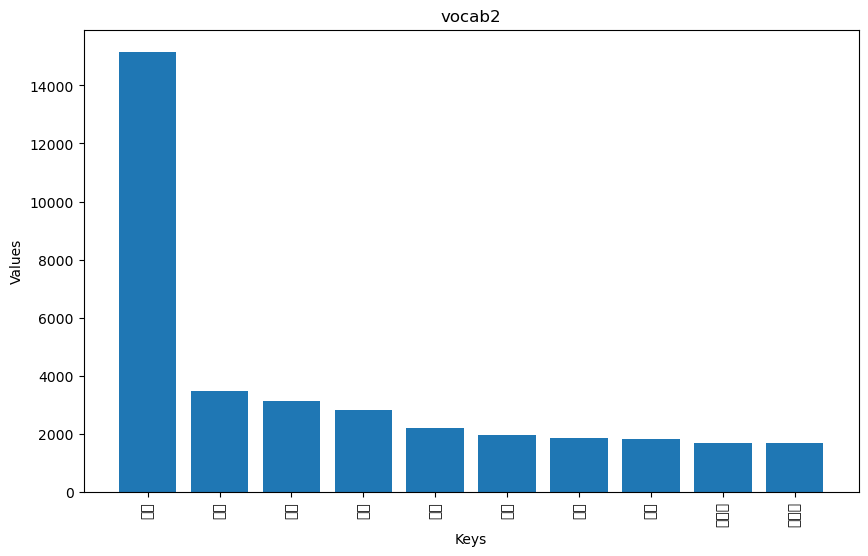

In [ ]:
import matplotlib.pyplot as plt
# import koreanize_matplotlib

sorted_vocab2 = sorted(vocab2.items(), key=lambda x: x[1], reverse=True)

keys = [k for k, v in sorted_vocab2]
values = [v for k, v in sorted_vocab2]

plt.figure(figsize=(10, 6))
plt.bar(keys[:10], values[:10])
plt.xticks(rotation=90)
plt.xlabel('Keys')
plt.ylabel('Values')
plt.title('vocab2')
plt.show()

In [ ]:
vocabSR = pd.Series(vocab)
vocabSR

평점      2180
나쁘진       12
않지        10
만점       177
더욱        90
        ... 
박약         1
닮았고        1
이등병        1
높았지만       1
불안하게       1
Length: 61430, dtype: int64

In [ ]:
vocabSR.index

Index(['평점', '나쁘진', '않지', '만점', '더욱', '아니잖아', '지루하지는', '않은데', '완전', '막장',
       ...
       '재미있으', '아니다싶다', '쌈뽕', '만났습니다', '쾌함', '박약', '닮았고', '이등병', '높았지만',
       '불안하게'],
      dtype='object', length=61430)

In [ ]:
vocabSR.shape[0]

61430

In [ ]:
# 정제

### [3] 데이터셋용 단어사전/어휘사전 생성 <hr>
- 최종 사용할 단어 수
- 특별한 의미의 문자 추가 : '<UNK>', '<PAD>'

In [ ]:
VOCAB_DICT = {0:'<UNK>', 1:'<PAD>'}

for idx in range(vocabSR.shape[0]):
    # print(vocabSR.index[idx])
    VOCAB_DICT[idx+2]=vocabSR.index[idx]
VOCAB_DICT

{0: '<UNK>',
 1: '<PAD>',
 2: '평점',
 3: '나쁘진',
 4: '않지',
 5: '만점',
 6: '더욱',
 7: '아니잖아',
 8: '지루하지는',
 9: '않은데',
 10: '완전',
 11: '막장',
 12: '임돈',
 13: '주고',
 14: '보기',
 15: '에는',
 16: '아니었어도',
 17: '줬을텐데',
 18: '로나',
 19: '심기',
 20: '불편하게하죠',
 21: '음악',
 22: '주가',
 23: '최고',
 24: '영화',
 25: '진정한',
 26: '쓰레기',
 27: '미국',
 28: '애니',
 29: '튀어나온듯',
 30: '창의력',
 31: '없는',
 32: '로봇',
 33: '디자인',
 34: '부터가',
 35: '고개',
 36: '젖게한',
 37: '갈수록',
 38: '개판',
 39: '되가는',
 40: '중국영화',
 41: '유치하고내용',
 42: '없음',
 43: '잡다',
 44: '끝남말도',
 45: '안되는',
 46: '무기',
 47: '유치한',
 48: '남무',
 49: '그립다',
 50: '동사서독',
 51: '같은',
 52: '이건',
 53: '류작',
 54: '이다',
 55: '이별',
 56: '아픔',
 57: '찾아오는',
 58: '새로운',
 59: '인연',
 60: '기쁨',
 61: '모든',
 62: '사람',
 63: '그렇지는',
 64: '않네',
 65: '괜찮네요',
 66: '오랜',
 67: '포켓몬스터',
 68: '잼밌',
 69: '한국',
 70: '독립영화',
 71: '한계',
 72: '그렇게',
 73: '아버지',
 74: '된다와',
 75: '비교',
 76: '청춘',
 77: '아름답',
 78: '다그',
 79: '아름다',
 80: '이성',
 81: '흔들어놓는다',
 82: '찰나',
 83: '포착',
 84: '섬세하고',
 85: '

In [ ]:
len(VOCAB_DICT)

61432

In [ ]:
documentDF['document'].shape

(49204,)

In [ ]:
documentDF['document'].shape[0], documentDF['document'][2], 

(49204, '뭐야이평점들은나쁘진않지만점짜리는더더욱아니잖아')

In [ ]:
### 문장을 수치화

test=['영화','최고','예산']

encoding=[]
sentence=[]

for tt in test:
    sentence.append(0)
    for k, v in VOCAB_DICT.items():
        if v==tt:
            sentence[-1]=k
            break

sentence

[24, 23, 999]

In [ ]:
### 수치값을 문자열로 변환 진행 즉, 디코딩

encoding=[]
words=[]

for tt in sentence:
    words.append(VOCAB_DICT.get(tt))
words

['영화', '최고', '예산']

In [ ]:
# sentence1 = []

# valueList = list(VOCAB_DICT.values())
# keyList = list(VOCAB_DICT.keys())

# for idx, value in enumerate(valueList):
#     if value == tt:
#         sentence1.append(keyList[idx])

        
# sentence1

[]

In [ ]:
# 단어사전

- 텍스트 데이터 인코딩

- 텍스트 데이터 패딩

In [ ]:
documentDF['document'][0]

'굳ㅋ'

In [ ]:
from kiwipiepy import Kiwi
from kiwipiepy.utils import Stopwords

kiwi = Kiwi()
stopwords = Stopwords()

tokenList = []

for i, row in documentDF.iterrows():
    text = row['document']
    tokens = kiwi.tokenize(text)
    filtered_tokens = stopwords.filter(tokens)
    tokenList.append(filtered_tokens)



[[Token(form='굳', tag='NNP', start=0, len=1)],
 [Token(form='뭐', tag='NP', start=0, len=1),
  Token(form='야', tag='EF', start=1, len=1),
  Token(form='평점', tag='NNG', start=3, len=2),
  Token(form='나쁘', tag='VA', start=7, len=2),
  Token(form='점', tag='NNG', start=13, len=1),
  Token(form='짜리', tag='XSN', start=14, len=2),
  Token(form='더더욱', tag='MAG', start=17, len=3),
  Token(form='잖아', tag='EF', start=22, len=2)],
 [Token(form='지루하', tag='VA', start=0, len=3),
  Token(form='은데', tag='EC', start=6, len=2),
  Token(form='완전', tag='MAG', start=8, len=2),
  Token(form='막장', tag='NNG', start=10, len=2),
  Token(form='ᆷ', tag='EF', start=12, len=1),
  Token(form='돈', tag='NNG', start=13, len=1),
  Token(form='주', tag='VV', start=14, len=1)],
 [Token(form='어도', tag='EC', start=4, len=2),
  Token(form='별', tag='MM', start=6, len=1),
  Token(form='다섯', tag='NR', start=7, len=2),
  Token(form='개', tag='NNB', start=9, len=1),
  Token(form='주', tag='VV', start=10, len=1),
  Token(form='터', tag

In [ ]:
tokenList = [tokens for tokens in tokenList if tokens]
tokenList, len(tokenList)

for a in range(len(tokenList)):
    for b in range(len(tokenList[a])):
        print(tokenList[a][b][1])

NNP
NP
EF
NNG
VA
NNG
XSN
MAG
EF
VA
EC
MAG
NNG
EF
NNG
VV
EC
MM
NR
NNB
VV
NNB
EC
MAG
XSM
VV
NP
NNG
NNG
EF
NNG
NNG
JKC
NNG
NNG
NNG
XR
NNG
MAG
NNP
NNG
VV
NNB
NNG
NNG
NNG
NNG
VA
MAG
NNG
VV
NNP
NNG
NNG
NNG
EC
NNG
VV-R
VV
EF
MAG
NNG
NNG
NNG
NNG
VA-I
NNP
NNG
NNG
NNG
NNG
NNG
NNG
NNG
VV
VA-I
NNG
NNG
MM
VA-I
EF
VA
EF
NNG
NNG
NNP
NNG
NNG
JX
NNP
NNG
NNG
NNG
MAG
NNG
JKC
EC
NNG
EF
NNG
VA-I
NNG
NNG
VV
VX
EC
NNG
NNG
MAG
NNG
XR
VA-I
NNG
NNP
NNG
NNG
VV
NNG
NNG
NNG
VV
NNG
NNG
NNG
NNG
NNG
NNG
JX
MAG
NNG
MM
NNG
MM
NNG
VV
NNP
NNG
NNG
NNG
NNG
NR
EC
NNG
NNG
NNG
NNG
VV
EF
MAG
NNG
NNG
NP
EF
NNG
NNG
NNG
MAG
MAG
MAG
VA-I
NNG
MAG
NNB
EC
NNG
MAG
EF
NNG
MM
NNG
NNB
VV
NNG
NNG
NR
NNB
EC
NNG
NNP
NNG
MAG
MAG
VA
NNG
NNG
VX
VV
NNG
NNG
MM
NNG
NNG
NNG
VV
NNG
NNG
NNG
VV
NNG
NNG
MAG
EC
MAG
NNG
NNG
NNB
NNG
VV-R
VV
MAG
MM
NNG
VV-R
JX
NNG
NNG
NNG
MAG
VA
NNG
NNG
NNG
VV
NNG
NNG
NNG
NNG
NNG
NNP
NNG
NNP
JKB
VV-R
NNG
NNG
NNG
NNG
XR
VV
MAG
VV
NNG
NNG
VV
VV
NNG
NNG
EC
VV
NNB
MM
NNG
VV
EC
NNG
MAG
MAG
EF
NNG
MAG
VV
NNG
VV
EC
EF
MAG
VV
NNB

In [ ]:
from gensim.models import Word2Vec

In [ ]:
word2vec = Word2Vec(
    sentences = tokens,
    vector_size = 128,
    window=5,
    min_count=1,
    sg=1,
    epochs=3,
    max_final_vocab=10000
)

In [ ]:
word2vec